In [259]:
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import time


In [260]:
df = pd.read_csv('csv/WineQT.csv')

In [261]:
df.drop(columns='Id')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [262]:
X = df.drop(columns=['Id','quality'])
y = df['quality']
features = X.columns

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=42, stratify=y)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [264]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

1. Feature: alcohol, Importance Score: 0.1502116193967193
2. Feature: sulphates, Importance Score: 0.11590734368813664
3. Feature: volatile acidity, Importance Score: 0.10663835130611597
4. Feature: total sulfur dioxide, Importance Score: 0.09795794575829002
5. Feature: density, Importance Score: 0.08798266915205212
6. Feature: chlorides, Importance Score: 0.07868868722218328
7. Feature: fixed acidity, Importance Score: 0.07797696852022498
8. Feature: citric acid, Importance Score: 0.0771312948294757
9. Feature: pH, Importance Score: 0.0770330732672052
10. Feature: residual sugar, Importance Score: 0.06548586943885254
11. Feature: free sulfur dioxide, Importance Score: 0.06498617742074415


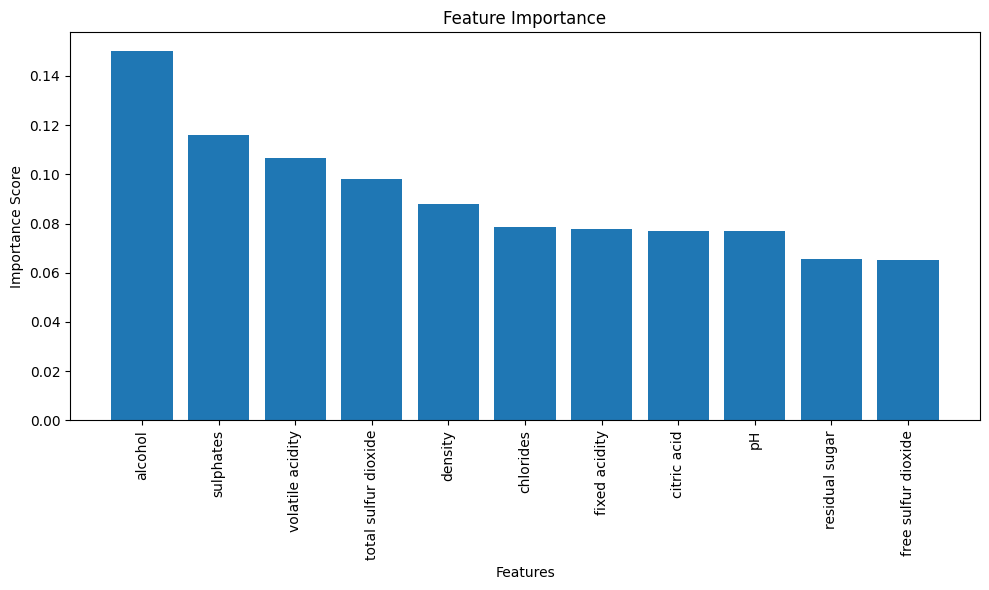

In [265]:
clf.feature_importances_

importance = clf.feature_importances_

feature_names = X_train.columns

sorted_idx = np.argsort(importance)[::-1]

# Print feature importance
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. Feature: {feature_names[idx]}, Importance Score: {importance[idx]}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[sorted_idx], align='center')
plt.xticks(range(len(importance)), [feature_names[idx] for idx in sorted_idx], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [266]:
pred = clf.predict(X_test)

In [267]:
# Test Score
clf.score(X_test,y_test)

0.7161572052401747

In [268]:
# Train Score 
print(clf.score(X_train,y_train))

1.0


In [269]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


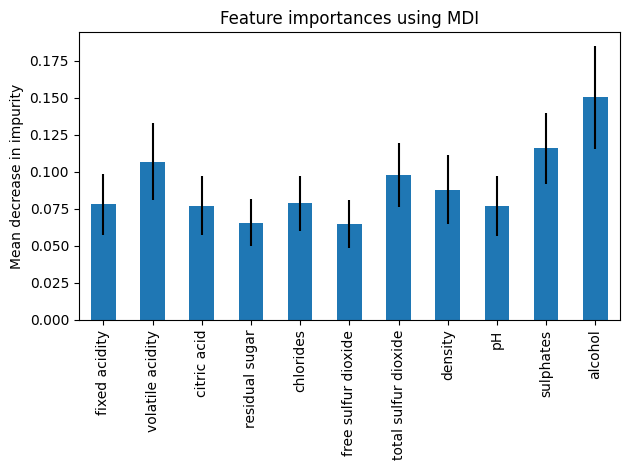

In [270]:
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

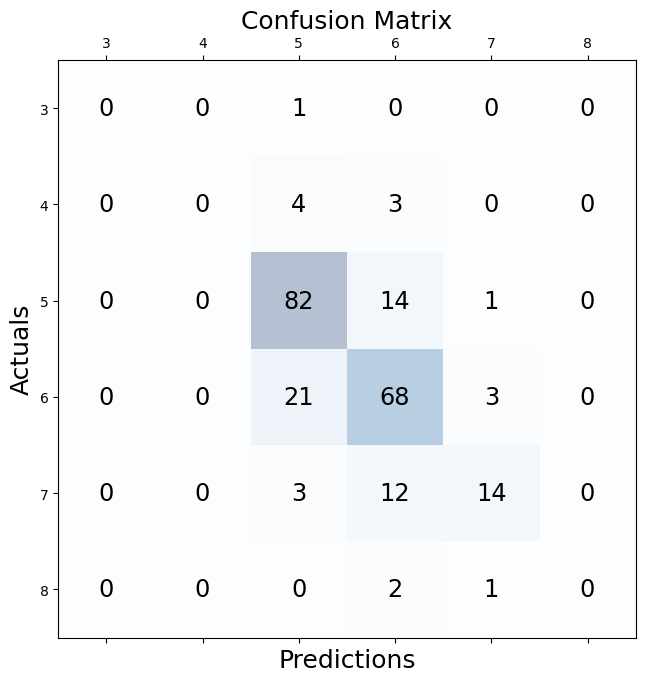

In [271]:
targets = [3,4,5,6,7,8]

conf_matrix = confusion_matrix(y_test,pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xticklabels([''] + targets)
ax.set_yticklabels([''] + targets)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [272]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [273]:
len(clf.estimators_)

100

<Axes: ylabel='quality'>

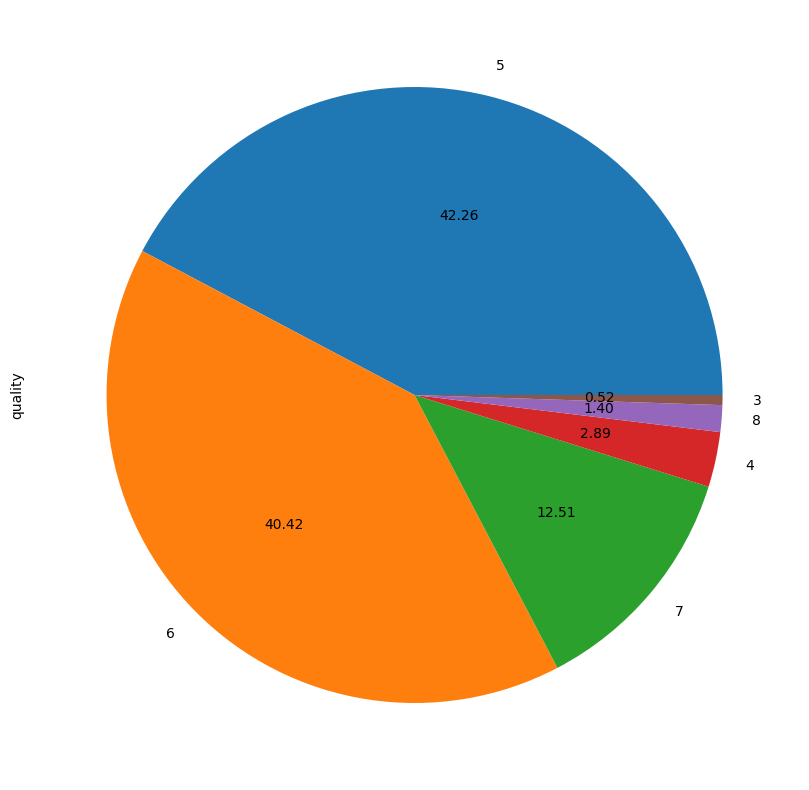

In [274]:
y.value_counts().plot.pie(autopct='%.2f',figsize=(10,10))

In [275]:
print(df.quality.value_counts())

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


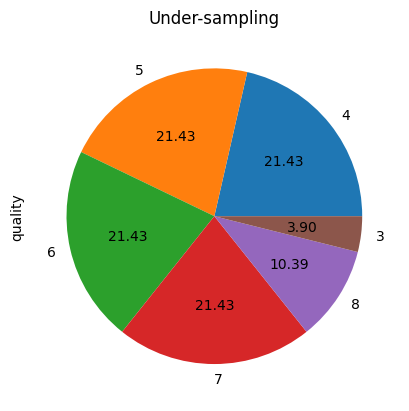

In [276]:
rus = RandomUnderSampler(sampling_strategy={5:33,6:33,7:33}) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

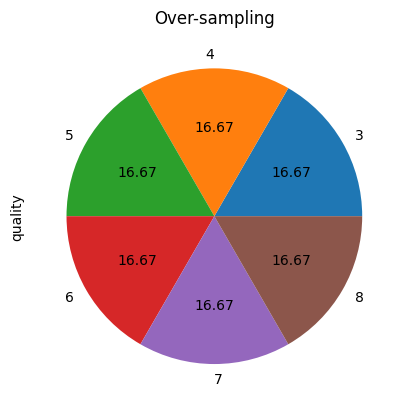

In [277]:
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy={8:33,3:33}) # String
X_ros, y_ros = ros.fit_resample(X_res, y_res)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [278]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros, train_size=0.7, random_state=42)
clf_2 = RandomForestClassifier()
clf_2.fit(X_train,y_train)

RandomForestClassifier()

In [279]:
clf_2.score(X_test,y_test)

0.5833333333333334

In [280]:
y_pred = clf_2.predict(X_test)
accuracy_score(y_pred,y_test)

0.5833333333333334

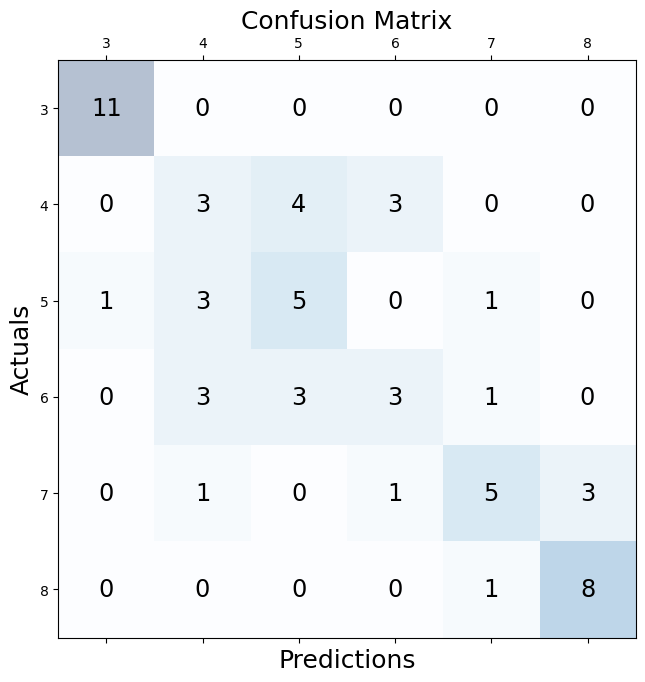

In [281]:
targets = [3,4,5,6,7,8]

conf_matrix = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xticklabels([''] + targets)
ax.set_yticklabels([''] + targets)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

___
SMOTE oversampler instead of RandomOversampler.

In [282]:
smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X, y)

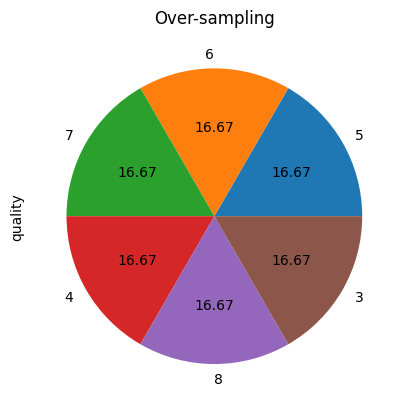

In [283]:
ax = y_oversampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [284]:
X_train,X_test,y_train,y_test = train_test_split(X_oversampled,y_oversampled, train_size=0.7, random_state=42)
clf_3 = RandomForestClassifier()
clf_3.fit(X_train,y_train)

clf_3.score(X_test,y_test)

y_pred_2 = clf_3.predict(X_test)
accuracy_score(y_test,y_pred_2)

0.8563218390804598

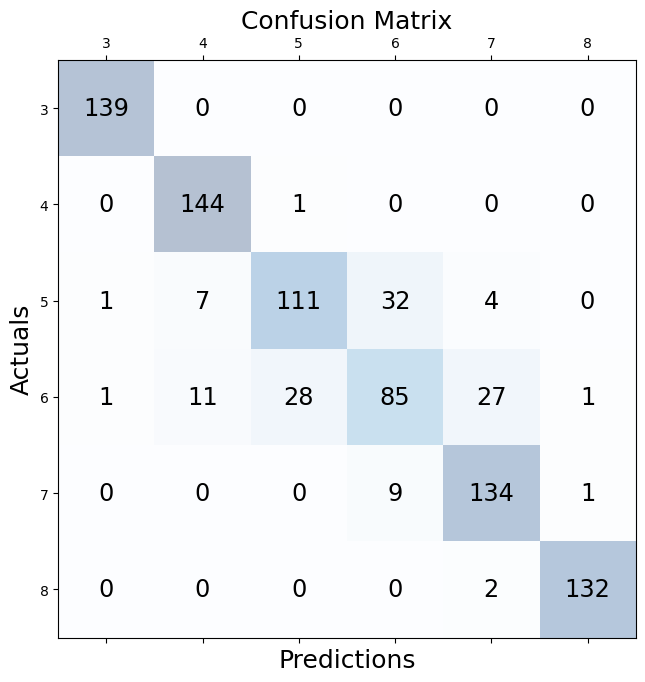

In [285]:
targets = [3,4,5,6,7,8]

conf_matrix = confusion_matrix(y_test,y_pred_2)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

ax.set_xticklabels([''] + targets)
ax.set_yticklabels([''] + targets)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()